In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
amazon_data=pd.read_csv('amazon.csv')
amazon_data.head()

,amazon_title,amazon_author,amazon_rating,amazon_reviews count,amazon_isbn-10,amazon_price
0,Tell Me your Dreams,by Sidney Sheldon,4.4,160.0,8172234902,209
1,The Boy in the Striped Pyjamas (Definitions),by John Boyne,4.6,134.0,1862305277,350
2,Romancing the Balance Sheet: For Anyone Who Ow...,by Anil Lamba,4.5,156.0,9350294311,477
3,Mossad,by Michael Bar-Zohar - Import,4.6,637.0,8184958455,340
4,My Story,by Kamala Das,4.5,42.0,8172238975,178


In [3]:
amazon_data.shape

(1382, 6)

In [4]:
amazon_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1382 entries, 0 to 1381
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   amazon_title          1382 non-null   object
 1   amazon_author         1382 non-null   object
 2   amazon_rating         1378 non-null   object
 3   amazon_reviews count  1378 non-null   object
 4   amazon_isbn-10        1382 non-null   int64 
 5   amazon_price          1382 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 64.9+ KB


In [5]:
amazon_data.isnull().sum()

amazon_title            0
amazon_author           0
amazon_rating           4
amazon_reviews count    4
amazon_isbn-10          0
amazon_price            0
dtype: int64

<AxesSubplot:>

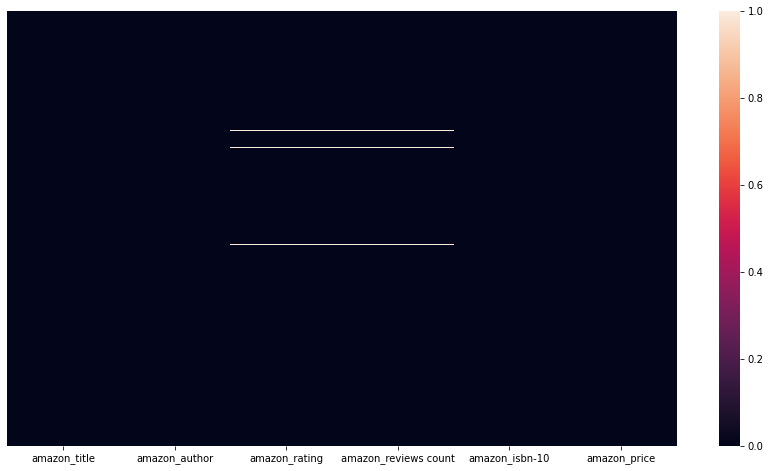

In [6]:
plt.figure(figsize=(15,8))
sns.heatmap(amazon_data.isnull(),cbar=True,yticklabels=False)

In [7]:
amazon_data=amazon_data.dropna(axis=0)

In [8]:
amazon_data['amazon_reviews count']=amazon_data['amazon_reviews count'].str.replace(",","")

In [10]:
amazon_data['amazon_reviews count']=pd.to_numeric(amazon_data['amazon_reviews count']).astype('int64')

In [11]:
amazon_data['amazon_price']=(amazon_data['amazon_price']).astype('float')

In [12]:
replace_values={'4.5 out of 5 stars':'4.5','4.6 out of 5 stars':'4.6','4.4 out of 5 stars':'4.4','4.1 out of 5 stars':'4.1','4.0 out of 5 stars':'4.0','4.2 out of 5 stars':'4.2','4.7 out of 5 stars':'4.7','3.6 out of 5 stars':'3.6','5.0 out of 5 stars':'5.0','4.3 out of 5 stars':'4.3'}
amazon_data.replace({'amazon_rating':replace_values},inplace=True)

In [13]:
amazon_data['amazon_rating']=pd.to_numeric(amazon_data['amazon_rating'])

In [14]:
amazon_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1378 entries, 0 to 1381
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   amazon_title          1378 non-null   object 
 1   amazon_author         1378 non-null   object 
 2   amazon_rating         1378 non-null   float64
 3   amazon_reviews count  1378 non-null   int64  
 4   amazon_isbn-10        1378 non-null   int64  
 5   amazon_price          1378 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 75.4+ KB


In [15]:
amazon_data.describe()

,amazon_rating,amazon_reviews count,amazon_isbn-10,amazon_price
count,1378.000000,1378.000000,1.378000e+03,1378.000000
mean,4.324020,492.148766,7.761269e+09,247.591437
std,0.393442,1016.414262,2.641236e+09,151.274270
min,1.000000,1.000000,1.250006e+09,1.000000
25%,4.100000,41.000000,8.172235e+09,135.250000
50%,4.400000,137.000000,8.192911e+09,213.000000
75%,4.600000,392.500000,9.352865e+09,320.000000
max,5.000000,6566.000000,9.960900e+09,895.000000


<AxesSubplot:xlabel='amazon_price', ylabel='Count'>

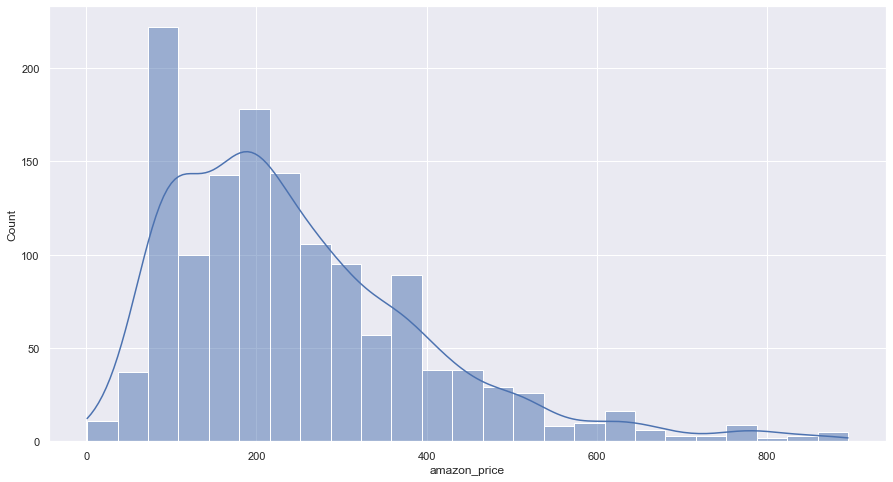

In [16]:
plt.figure(figsize=(15,8))
sns.set(style="darkgrid")
sns.histplot(data=amazon_data,x="amazon_price",kde=True,bins=25)

<AxesSubplot:xlabel='amazon_reviews count', ylabel='Count'>

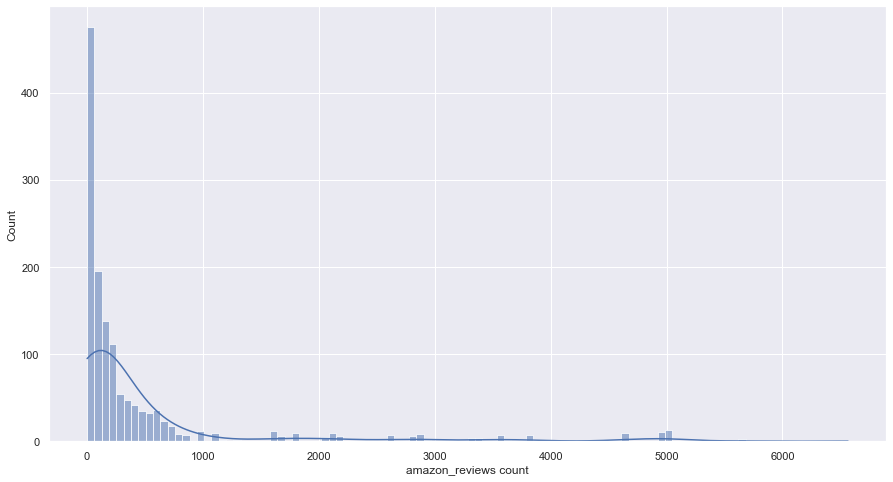

In [17]:
plt.figure(figsize=(15,8))
sns.set(style="darkgrid")
sns.histplot(data=amazon_data,x="amazon_reviews count",kde=True, legend=True)

In [18]:
amazon_data['amazon_rating'].value_counts()

4.4    229
4.5    200
4.6    157
4.3    135
4.1    123
4.2    109
4.7     92
4.0     74
4.8     56
3.9     35
5.0     33
3.8     27
3.7     25
3.6     22
4.9     14
3.5     13
3.4     12
3.3      8
3.0      3
1.0      3
1.4      2
3.1      2
3.2      2
2.0      1
2.4      1
Name: amazon_rating, dtype: int64

<AxesSubplot:xlabel='amazon_rating', ylabel='Count'>

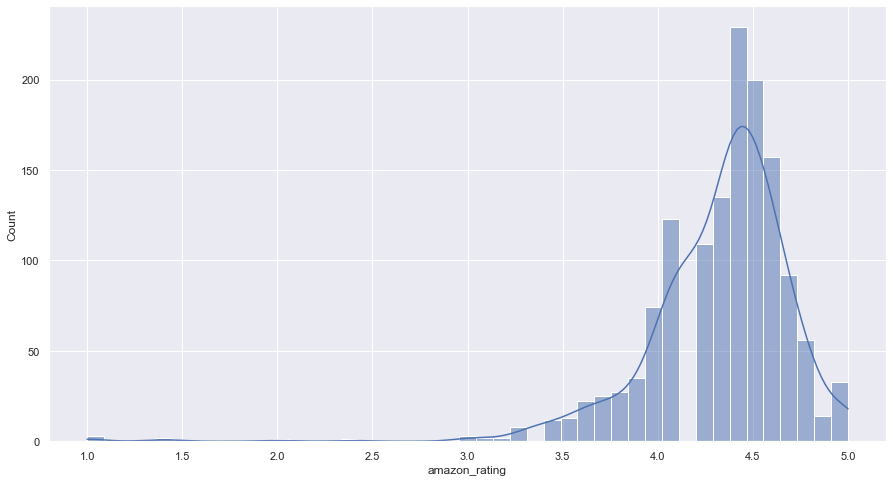

In [19]:
plt.figure(figsize=(15,8))
sns.set(style="darkgrid")
sns.histplot(data=amazon_data,x=amazon_data['amazon_rating'],kde=True)

Most of the books rated in the range 3.0 to 5.0

In [20]:
author_list=amazon_data['amazon_author'].value_counts().index
author_values=amazon_data['amazon_author'].value_counts().values

Text(0, 0.5, 'Authors on Amazon')

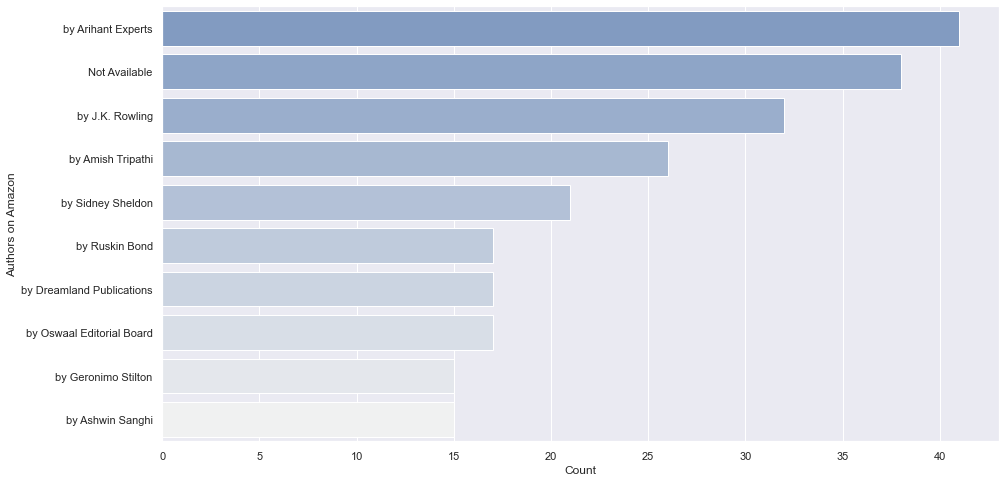

In [21]:
plt.figure(figsize=(15,8))
sns.set(style="darkgrid")
sns.barplot(x=author_values[0:10],y=author_list[0:10],data=amazon_data,palette='light:#79C_r')
plt.xlabel("Count")
plt.ylabel("Authors on Amazon")

In [22]:
flipkart_data=pd.read_csv('flipkart.csv')

flipkart_data.head()

,flipkart_author,flipkart_isbn10,flipkart_title,flipkart_ratings count,flipkart_price,flipkart_stars
0,Sidney Sheldon,8172234902,TELL ME YOUR DREAMS,902,209,4.5
1,,1862305277,The Boy in the Striped Pyjamas,83,372,4.5
2,Anil Lamba,9350294311,ROMANCING THE BALANCE SHEET,352,477,4.5
3,Bar-Zohar Michael,8184958455,Mossad,560,280,4.5
4,Kamala Das,8172238975,MY STORY,322,178,4.3


In [23]:
flipkart_data.shape

(1382, 6)

In [24]:
flipkart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1382 entries, 0 to 1381
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   flipkart_author         1382 non-null   object
 1   flipkart_isbn10         1382 non-null   int64 
 2   flipkart_title          1382 non-null   object
 3   flipkart_ratings count  1382 non-null   object
 4   flipkart_price          1382 non-null   int64 
 5   flipkart_stars          1382 non-null   object
dtypes: int64(2), object(4)
memory usage: 64.9+ KB


In [25]:
flipkart_data.isnull().sum()

flipkart_author           0
flipkart_isbn10           0
flipkart_title            0
flipkart_ratings count    0
flipkart_price            0
flipkart_stars            0
dtype: int64

In [26]:
flipkart_data['flipkart_stars'].unique()

array(['4.5', '4.3', '4.2', '4.4', '4.1', '4.6', ' ', '4.8', '4.7', '5',
       '4.9', '3.6', '4', '3.8', '3.9', '3', '3.7'], dtype=object)

In [27]:
replacing={'4':'4.0','3':'3.0','5':'5.0'}
flipkart_data.replace({'flipkart_stars':replacing},inplace=True)

In [28]:
flipkart_data['flipkart_stars'].value_counts()

4.5    350
4.4    319
4.3    207
4.6    197
4.2     92
4.7     57
4.8     36
4.1     34
4.0     25
        24
5.0     13
3.9     10
4.9      7
3.8      6
3.6      2
3.0      2
3.7      1
Name: flipkart_stars, dtype: int64

In [29]:
flipkart_data['flipkart_ratings count'].value_counts()

        24
18      17
5       16
35      15
631     12
        ..
174      1
206      1
535      1
2002     1
2083     1
Name: flipkart_ratings count, Length: 466, dtype: int64

In [30]:
flipkart_data=flipkart_data.replace(' ',np.nan)

<AxesSubplot:>

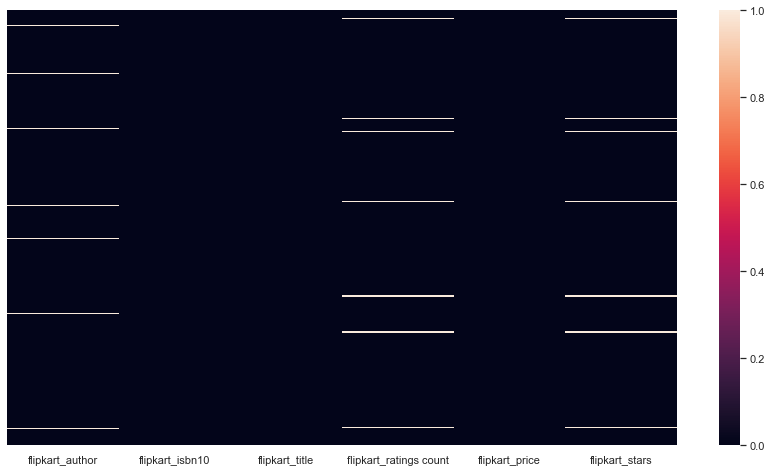

In [31]:
plt.figure(figsize=(15,8))
sns.heatmap(flipkart_data.isnull(),cbar=True,yticklabels=False)

In [32]:
flipkart_data=flipkart_data.dropna(axis=0)

In [33]:
flipkart_data['flipkart_stars']=pd.to_numeric(flipkart_data['flipkart_stars'])
flipkart_data['flipkart_ratings count']=pd.to_numeric(flipkart_data['flipkart_ratings count']).astype('int64')
flipkart_data['flipkart_price']=(flipkart_data['flipkart_price']).astype('float')

In [34]:
flipkart_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1333 entries, 0 to 1381
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   flipkart_author         1333 non-null   object 
 1   flipkart_isbn10         1333 non-null   int64  
 2   flipkart_title          1333 non-null   object 
 3   flipkart_ratings count  1333 non-null   int64  
 4   flipkart_price          1333 non-null   float64
 5   flipkart_stars          1333 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 72.9+ KB


In [35]:
flipkart_data.isnull().sum()

flipkart_author           0
flipkart_isbn10           0
flipkart_title            0
flipkart_ratings count    0
flipkart_price            0
flipkart_stars            0
dtype: int64

In [36]:
flipkart_data.describe()

,flipkart_isbn10,flipkart_ratings count,flipkart_price,flipkart_stars
count,1.333000e+03,1333.000000,1333.000000,1333.000000
mean,7.812172e+09,1637.322581,257.095274,4.434059
std,2.593080e+09,3943.680320,156.334824,0.192918
min,1.250006e+09,2.000000,30.000000,3.000000
25%,8.172235e+09,104.000000,149.000000,4.300000
50%,8.192911e+09,371.000000,220.000000,4.400000
75%,9.352865e+09,1399.000000,319.000000,4.500000
max,9.562913e+09,48324.000000,1581.000000,5.000000


<AxesSubplot:xlabel='flipkart_price', ylabel='Count'>

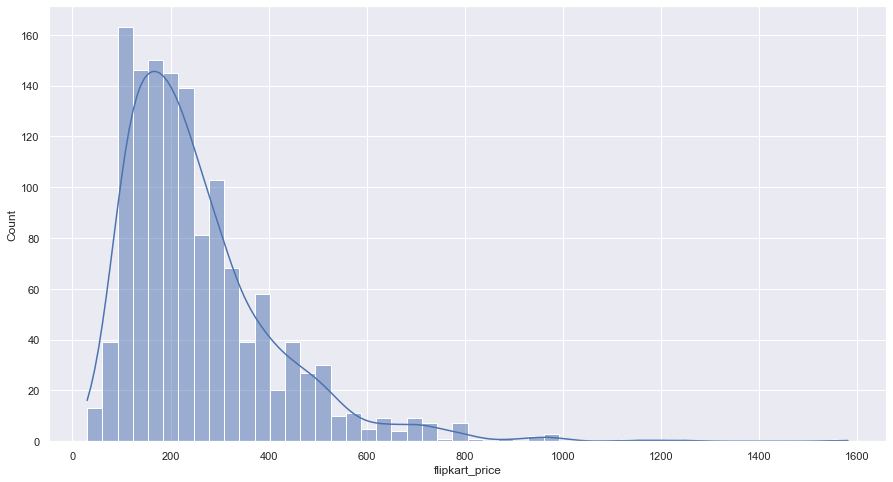

In [37]:
plt.figure(figsize=(15,8))
sns.set(style="darkgrid")
sns.histplot(data=flipkart_data,x="flipkart_price",kde=True,bins=50)

Most of the book prices lies in the range of 0 -1000

<AxesSubplot:xlabel='flipkart_stars', ylabel='Count'>

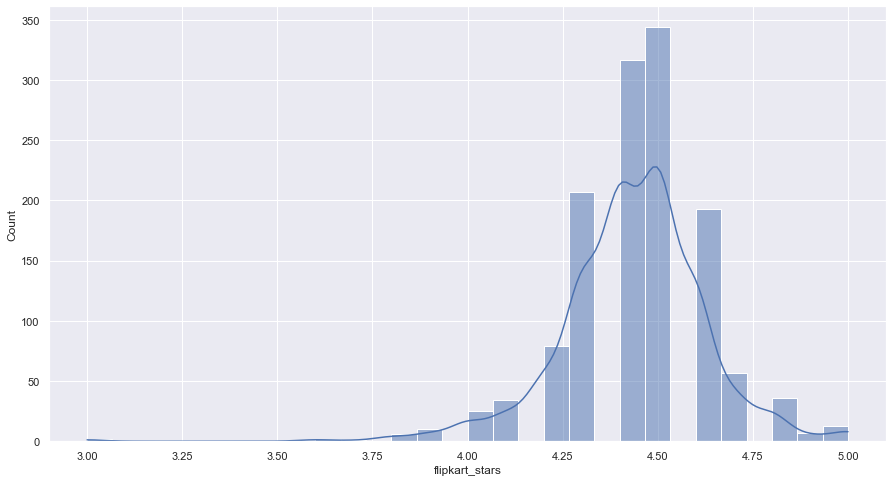

In [38]:
plt.figure(figsize=(15,8))
sns.set(style="darkgrid")
sns.histplot(data=flipkart_data,x="flipkart_stars",bins=30,kde=True)

In [39]:
authors=flipkart_data['flipkart_author'].value_counts().index
val=flipkart_data['flipkart_author'].value_counts().values

Text(0, 0.5, 'Authors on flipkart')

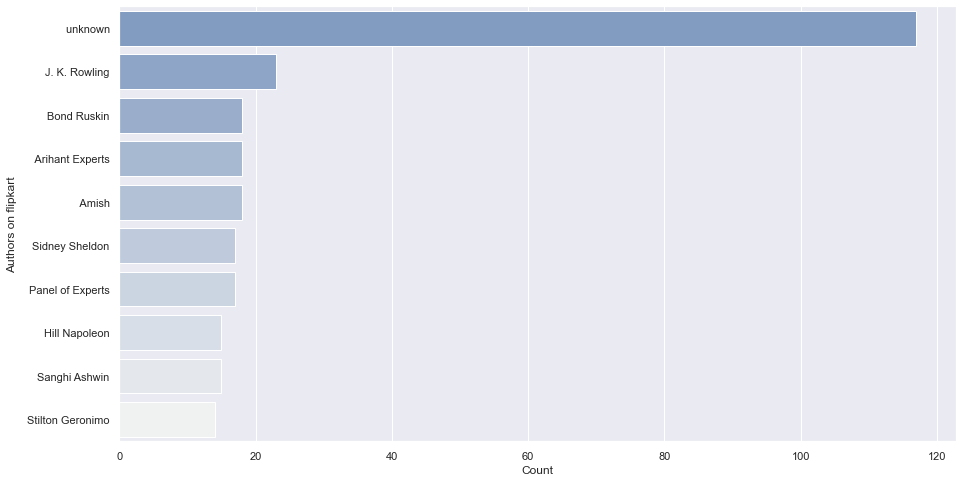

In [40]:
plt.figure(figsize=(15,8))
sns.set(style="darkgrid")
sns.barplot(x=val[0:10],y=authors[0:10],data=flipkart_data,palette='light:#79C_r')
plt.xlabel("Count")
plt.ylabel("Authors on flipkart")

In [41]:
amazon_data.head()

,amazon_title,amazon_author,amazon_rating,amazon_reviews count,amazon_isbn-10,amazon_price
0,Tell Me your Dreams,by Sidney Sheldon,4.4,160,8172234902,209.0
1,The Boy in the Striped Pyjamas (Definitions),by John Boyne,4.6,134,1862305277,350.0
2,Romancing the Balance Sheet: For Anyone Who Ow...,by Anil Lamba,4.5,156,9350294311,477.0
3,Mossad,by Michael Bar-Zohar - Import,4.6,637,8184958455,340.0
4,My Story,by Kamala Das,4.5,42,8172238975,178.0


In [42]:
flipkart_data.head()

,flipkart_author,flipkart_isbn10,flipkart_title,flipkart_ratings count,flipkart_price,flipkart_stars
0,Sidney Sheldon,8172234902,TELL ME YOUR DREAMS,902,209.0,4.5
2,Anil Lamba,9350294311,ROMANCING THE BALANCE SHEET,352,477.0,4.5
3,Bar-Zohar Michael,8184958455,Mossad,560,280.0,4.5
4,Kamala Das,8172238975,MY STORY,322,178.0,4.3
5,Abdul Kalam A. P. J.,8170286840,Inspiring Thoughts,357,149.0,4.2


In [43]:
joint_data=amazon_data.merge(flipkart_data,left_on="amazon_isbn-10",right_on='flipkart_isbn10',how='inner')

In [44]:
joint_data.head()

,amazon_title,amazon_author,amazon_rating,amazon_reviews count,amazon_isbn-10,amazon_price,flipkart_author,flipkart_isbn10,flipkart_title,flipkart_ratings count,flipkart_price,flipkart_stars
0,Tell Me your Dreams,by Sidney Sheldon,4.4,160,8172234902,209.0,Sidney Sheldon,8172234902,TELL ME YOUR DREAMS,902,209.0,4.5
1,Tell Me your Dreams,by Sidney Sheldon,4.4,160,8172234902,209.0,Sidney Sheldon,8172234902,TELL ME YOUR DREAMS,902,209.0,4.5
2,Tell Me your Dreams,by Sidney Sheldon,4.4,160,8172234902,209.0,Sidney Sheldon,8172234902,TELL ME YOUR DREAMS,902,209.0,4.5
3,Tell Me your Dreams,by Sidney Sheldon,4.4,160,8172234902,209.0,Sidney Sheldon,8172234902,TELL ME YOUR DREAMS,902,209.0,4.5
4,Tell Me your Dreams,by Sidney Sheldon,4.4,160,8172234902,209.0,Sidney Sheldon,8172234902,TELL ME YOUR DREAMS,902,209.0,4.5


In [45]:
joint_data=joint_data.drop_duplicates()

In [46]:
joint_data.shape

(682, 12)

In [47]:
joint_data.isnull().sum()

amazon_title              0
amazon_author             0
amazon_rating             0
amazon_reviews count      0
amazon_isbn-10            0
amazon_price              0
flipkart_author           0
flipkart_isbn10           0
flipkart_title            0
flipkart_ratings count    0
flipkart_price            0
flipkart_stars            0
dtype: int64

In [48]:
joint_data=joint_data.rename(columns={"amazon_title":"Book_title","amazon_author":"Book_Author",
                                     "flipkart_stars":"flipkart_rating",
                                    "flipkart_ratings count":"flipkart_reviews count"})

In [49]:
joint_data=joint_data.drop(["flipkart_author","amazon_isbn-10","flipkart_isbn10","flipkart_title"],axis=1)

In [50]:
joint_data=joint_data[["Book_title","Book_Author","amazon_price","flipkart_price","amazon_rating","flipkart_rating","amazon_reviews count","flipkart_reviews count"]]

In [51]:
joint_data.head()

,Book_title,Book_Author,amazon_price,flipkart_price,amazon_rating,flipkart_rating,amazon_reviews count,flipkart_reviews count
0,Tell Me your Dreams,by Sidney Sheldon,209.0,209.0,4.4,4.5,160,902
36,Romancing the Balance Sheet: For Anyone Who Ow...,by Anil Lamba,477.0,477.0,4.5,4.5,156,352
45,Mossad,by Michael Bar-Zohar - Import,340.0,280.0,4.6,4.5,637,560
94,My Story,by Kamala Das,178.0,178.0,4.5,4.3,42,322
110,Inspiring Thoughts (Inspiring Thoughts Quotati...,by A.P.J. Abdul Kalam,120.0,149.0,4.1,4.2,148,357


In [52]:
joint_data.describe()

,amazon_price,flipkart_price,amazon_rating,flipkart_rating,amazon_reviews count,flipkart_reviews count
count,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000
mean,261.366569,271.416422,4.280352,4.416276,285.313783,951.472141
std,153.249819,171.013923,0.418684,0.211315,760.847029,3011.981614
min,1.000000,30.000000,1.000000,3.000000,1.000000,2.000000
25%,154.500000,155.250000,4.100000,4.300000,24.250000,57.250000
50%,226.500000,227.000000,4.400000,4.400000,69.000000,224.000000
75%,338.250000,339.500000,4.500000,4.500000,201.750000,677.750000
max,895.000000,1581.000000,5.000000,5.000000,6566.000000,48324.000000


Text(0.5, 1.0, 'Amazon Prices Vs. Flipkart Prices')

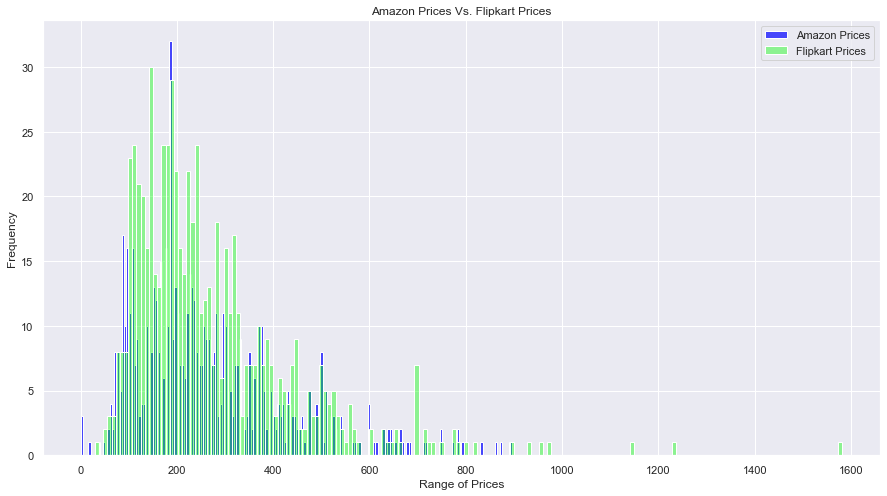

In [53]:
plt.figure(figsize=(15,8))
sns.set(style="darkgrid")
m=plt.hist(joint_data["amazon_price"],bins=180,fc = (0,0,1,0.7),label="Amazon Prices")
b = plt.hist(joint_data["flipkart_price"],bins=180,fc = (0,1,0,0.4),label = "Flipkart Prices")
plt.legend()
plt.xlabel("Range of Prices")
plt.ylabel("Frequency")
plt.title("Amazon Prices Vs. Flipkart Prices")

From the above visuals we can conclude that the prices of books on Flipkart are slightly higher than that on Amazon

Text(0.5, 1.0, 'Amazon Ratings Vs. Flipkart Ratings')

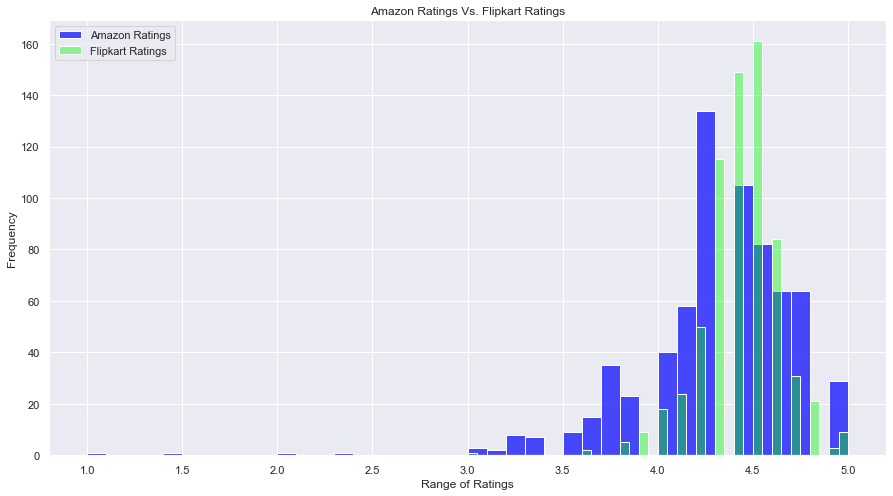

In [54]:
plt.figure(figsize=(15,8))
sns.set(style="darkgrid")
m = plt.hist(joint_data["amazon_rating"],bins=40,fc = (0,0,1,0.7),label="Amazon Ratings")
b = plt.hist(joint_data["flipkart_rating"],bins=40,fc = (0,1,0,0.4),label = "Flipkart Ratings")
plt.legend()
plt.xlabel("Range of Ratings")
plt.ylabel("Frequency")
plt.title("Amazon Ratings Vs. Flipkart Ratings")

The ratings in amazon are more distributed than in flipkart

Text(0.5, 1.0, 'Amazon Reviews Vs. Flipkart Reviews')

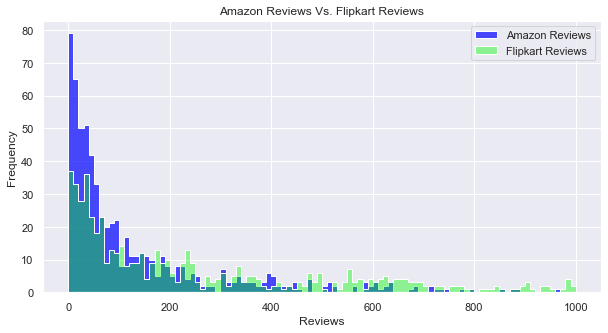

In [55]:
plt.figure(figsize=(10,5))
sns.set(style="darkgrid")
m = plt.hist(joint_data["amazon_reviews count"],bins=100,fc = (0,0,1,0.7),label="Amazon Reviews", histtype='stepfilled', range=[0,1000])
b = plt.hist(joint_data["flipkart_reviews count"],bins=100,fc = (0,1,0,0.4),label = "Flipkart Reviews", histtype='stepfilled', range=[0,1000])
plt.legend()
plt.xlabel("Reviews")
plt.ylabel("Frequency")
plt.title("Amazon Reviews Vs. Flipkart Reviews")

In Amazon the freuency(more books) of rating betweem 0-200 is higher and in flipkart count for reviews above 200 is higher  

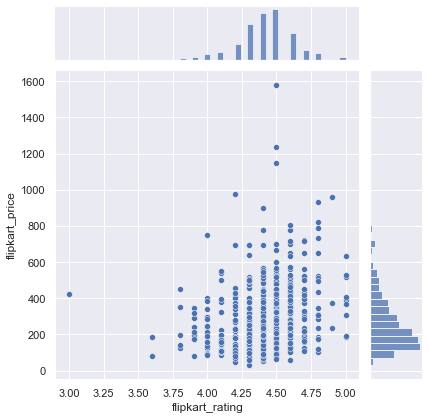

In [56]:
sns.set(style="darkgrid")
sns.jointplot(x="flipkart_rating",y="flipkart_price",data=joint_data)

Books rated between 4.25-4.75 are the most expensive books on Flipkart

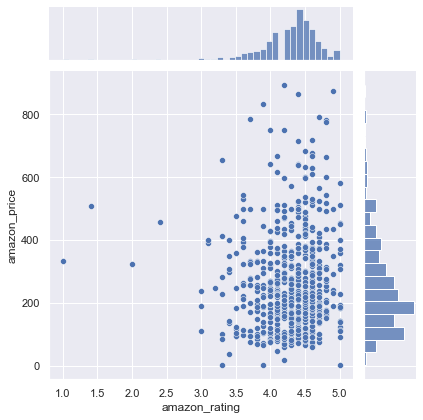

In [57]:
sns.set(style="darkgrid")
sns.jointplot(x='amazon_rating',y='amazon_price',data=joint_data)

Books rated between 3.50-4.75 are the most expensive books on Amazon

In [58]:
##fig = plt.figure(figsize = (15, 10))
##sns.pairplot(joint_data,height=3,aspect=1)

<AxesSubplot:>

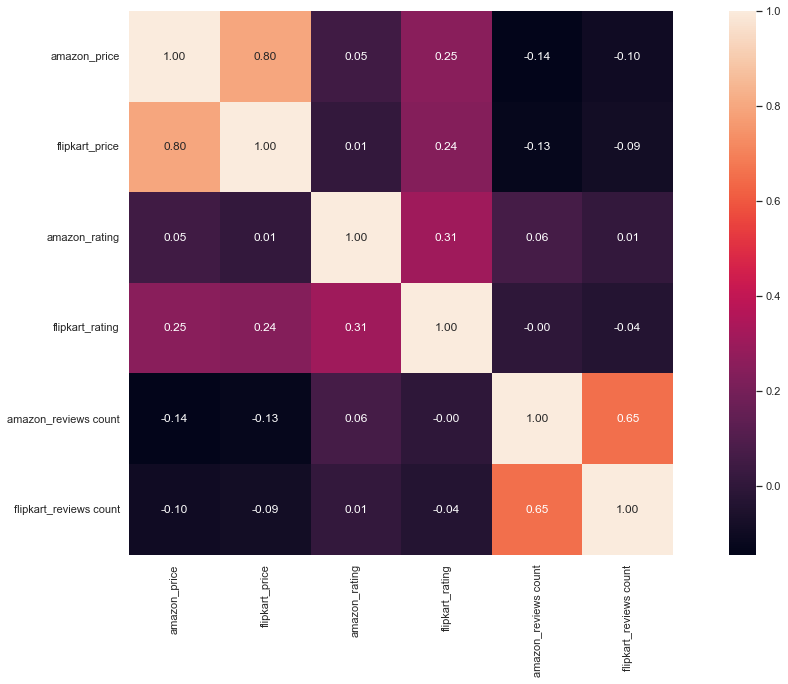

In [59]:
corrmat = joint_data.corr()
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrmat,square=True,annot=True, fmt='.2f')